## Simple legend example

This is the simplest use case for the plugin. We plot a few lines, instantiate the InteractiveLegendPlugin, and connect it to the figure. Note that we pass the labels for each of the lines explicitly. At the moment the label information of matplotlib is not passed along to D3. The plugin creates a legend to the right of the axes starting at the top. Each of the rectangles is clickable. When a legend item is selected, the rectangle is filled. 


In [5]:
import mpld3
from mpld3 import plugins
from mpld3.utils import get_id
import numpy as np
import collections
import matplotlib.pyplot as plt

N_paths = 5
N_steps = 100

x = np.linspace(0, 10, 100)
y = 0.1 * (np.random.random((N_paths, N_steps)) - 0.5)
y = y.cumsum(1)

fig, ax = plt.subplots()
labels = ["a", "b", "c", "d", "e"]
line_collections = ax.plot(x, y.T, lw=4, alpha=0.2)
interactive_legend = plugins.InteractiveLegendPlugin(line_collections, labels)
plugins.connect(fig, interactive_legend)

mpld3.display()

## We can link multiple elements to a single legend item

There is the possibility to link more than one matplotlib element (e.g. a line) to a single item in the legend. As demonstrated by the example below. The plugin needs a list of matplotlib items, a list of lists, or a hybrid. Thus, it is possible to link one legend item to several elements in the plot, while another legend item is linked only to a single item. In case of multiple items being associated with a single legend item, the box takes on the color of the first item in the list. 

In [2]:
N_paths = 5
N_steps = 100

x1 = np.linspace(0, 10, 100)
y = 0.1 * (np.random.random((N_paths, N_steps)) - 0.5)
y1 = y.cumsum(1)

x2 = np.linspace(0, 10, 100)
y = 0.1 * (np.random.random((N_paths, N_steps)) - 0.5)
y2 = y.cumsum(1)

fig, ax = plt.subplots()
labels = ["a", "b",]
l1 = ax.plot(x1, y1.T, lw=4, alpha=0.1, c='b', label='a')
l2 = ax.plot(x2, y2.T, lw=4, alpha=0.2, c='r', label='b')

line_collections = [l1,l2]
plugins.connect(fig, plugins.InteractiveLegendPlugin(line_collections, labels))

mpld3.display()

## Legends for different axes

By default, the legend is shown to the right of the first axes. However, through the use of the optional keyword argument 'ax', we can specify the axes to the right of which the legend will be shown.

AttributeError: '_process_plot_var_args' object has no attribute 'prop_cycle'

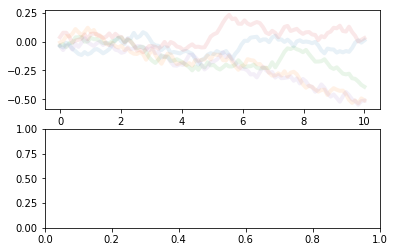

In [4]:
N_paths = 5
N_steps = 100

x = np.linspace(0, 10, 100)
y = 0.1 * (np.random.random((N_paths, N_steps)) - 0.5)
y = y.cumsum(1)

fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

labels = ["a", "b", "c", "d", "e"]
l1 = ax1.plot(x, y.T, lw=4, alpha=0.1)
s1 = []
for i in range(N_paths):
    s = ax2.scatter(x,y[i, :], c=next(ax2._get_lines.color_cycle), alpha=0.1)
    s1.append(s)
    
plugins.connect(fig, plugins.InteractiveLegendPlugin(l1, labels, ax=ax1))
plugins.connect(fig, plugins.InteractiveLegendPlugin(s1, labels, ax=ax2))
mpld3.display()

## single legend for different axes

We can link multiple matplotlib elements to a single item in the legend. This functionality works even when the elements belong to different axes as shown below. 

In [ ]:
N_paths = 5
N_steps = 100

x = np.linspace(0, 10, 100)
y = 0.1 * (np.random.random((N_paths, N_steps)) - 0.5)
y = y.cumsum(1)


fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

labels = ["a", "b", "c", "d", "e"]
l1 = ax1.plot(x, y.T, lw=4, alpha=0.1)
s1 = []
for i in range(N_paths):
    s = ax2.scatter(x,y[i, :], c=next(ax2._get_lines.color_cycle), alpha=0.1)
    s1.append(s)
    
plugins.connect(fig, plugins.InteractiveLegendPlugin(zip(l1, s1), labels))
mpld3.display()

## scatterplot demo

In [ ]:
nr_elements = 5

fig, ax = plt.subplots()
elements = []
for i in range(nr_elements):
    x = np.random.rand(100)
    y = np.random.rand(100)
    
    element = ax.scatter(x,y, color=next(ax2._get_lines.color_cycle), alpha=0.2, marker='+')
    elements.append([element])

labels = ["{}".format(i) for i in range(nr_elements)]
plugins.connect(fig, plugins.InteractiveLegendPlugin(elements, labels))
mpld3.display()

## Markers and Lines in case of Line2D instances
A Line2d instance can have both a line, as well as markers at each vertex. In D3 these are two distinct things. The interactive legend can handle both as demonstrated by the example below. See the code and comments there on how this is achieved for details. 


In [ ]:
N_paths = 5
N_steps = 100

x = np.linspace(0, 10, 100)
y = 0.1 * (np.random.random((N_paths, N_steps)) - 0.5)
y = y.cumsum(1)


fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

labels = ["a", "b", "c", "d", "e"]
l1 = ax1.plot(x, y.T, marker='x',lw=2, alpha=0.1)
s1 = ax2.plot(x, y.T, 'o', ms=8, alpha=0.1)
    
plugins.connect(fig, plugins.InteractiveLegendPlugin(zip(l1, s1), labels))
mpld3.display()